In [1]:
import sys
sys.path.append('/public/src')
from factor_evaluation_server import FactorEvaluation,DataService # type: ignore
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import pandas_ta as ta

In [2]:
ds=DataService()
df=ds['ETHUSDT_15m_2020_2025']['2021-10-01':]

In [3]:
evaluator=FactorEvaluation(df=df,future_return_periods=10)

# 定义因子！

In [4]:
def sumd_factor(df, window=60):
    """
    计算SUMD因子（总收益与总损失之间的差异比率）
    公式：(Sum(Greater(close-Ref(close, 1), 0), window) - 
          Sum(Greater(Ref(close, 1)-close, 0), window)) /
          (Sum(Abs(close-Ref(close, 1)), window) + 1e-12)
    
    参数:
    df: 包含OHLCV数据的DataFrame
    window: 滚动窗口大小 (默认10)
    """
    close = df['close']
    
    # 计算价格变化
    price_diff = close.diff()
    
    # 计算收益部分（价格上涨）
    gain = price_diff.where(price_diff > 0, 0)
    
    # 计算损失部分（价格下跌）
    loss = (-price_diff).where(price_diff < 0, 0)
    
    # 计算滚动窗口内的总收益
    sum_gain = gain.rolling(window).sum()
    
    # 计算滚动窗口内的总损失
    sum_loss = loss.rolling(window).sum()
    
    # 计算总绝对变化
    sum_abs = (sum_gain + sum_loss) + 1e-12
    
    # 计算SUMD因子
    factor = (sum_gain - sum_loss) / sum_abs
    
    return factor

# 因子测试

In [5]:
evaluator.set_factor(
    factor_func=sumd_factor,
    factor_name='sumd_factor'
)


📊 单币种 (single) 详细评估结果:
--------------------------------------------------
🔗 相关性分析:
   IC (Pearson): 0.019721
   Rank_IC (Spearman): -0.023747
📊 信息比率:
   IR: 0.234583
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 130881
   因子列: sumd_factor
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


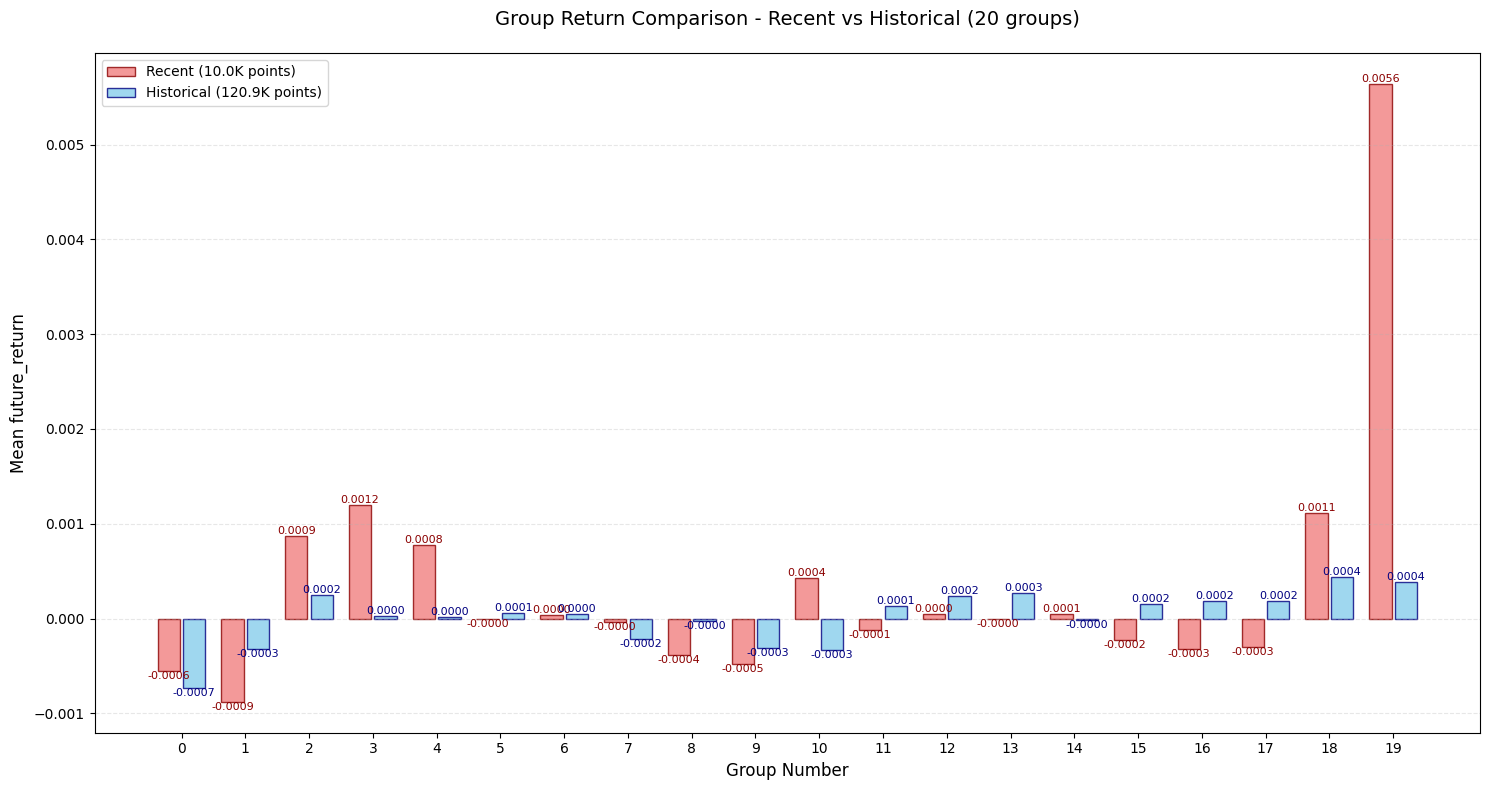

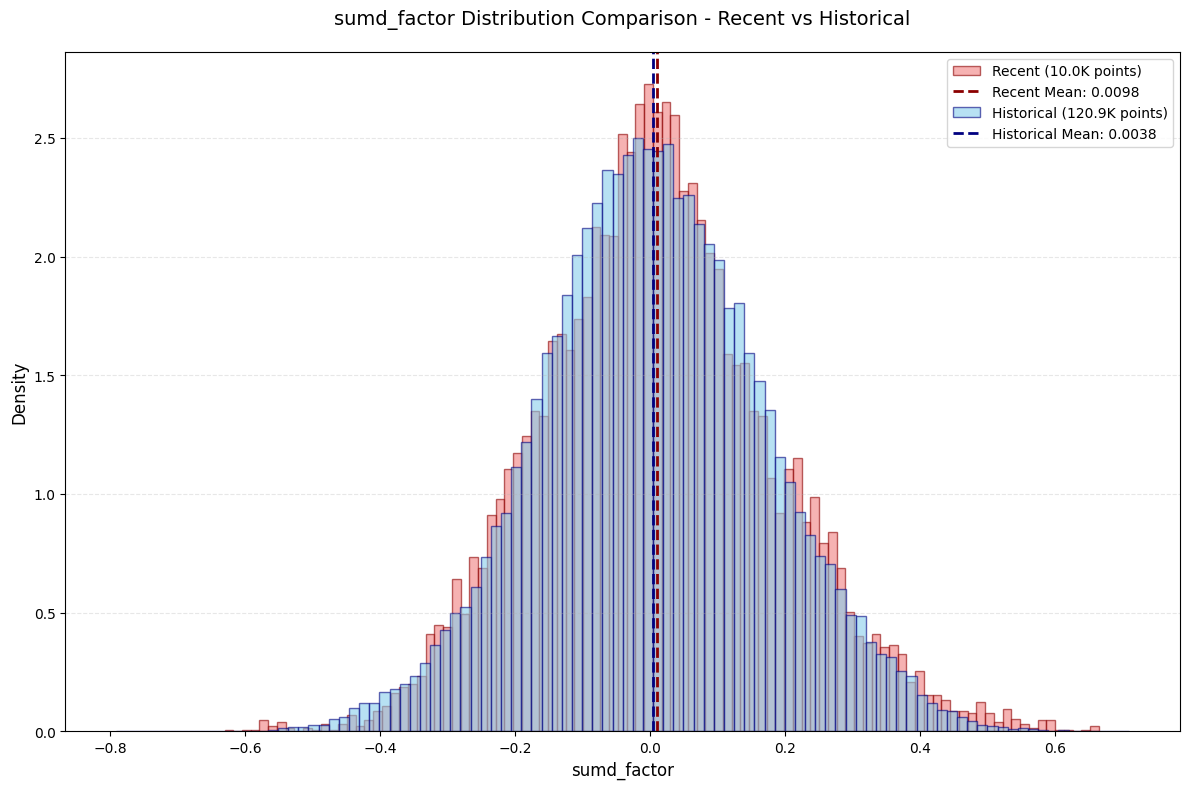

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------


In [6]:
result=evaluator.run_full_evaluation(run_stationarity_test=False)

In [7]:
print(result)

{'correlation_analysis': {'IC': 0.019720822112540306, 'Rank_IC': -0.023747404674849037}, 'information_ratio': {'IR': 0.23458261118245768, 'group_correlations': [0.0045258571171179806, -0.009585622870343894, -0.0018415350619032512, -0.009946951654816873, -0.0009388680976345761, 0.023867674581071807, -0.003525088532776972, 0.007854114560531419, -0.0058826312583517, 0.022496065503891657], 'n_groups': 10}, 'group_analysis': {'group_stats':        val_min  val_max  val_mean  return_mean  return_std  count
group                                                            
0      -0.7914  -0.2694   -0.3414      -0.0007      0.0166   6545
1      -0.2694  -0.2052   -0.2340      -0.0004      0.0139   6544
2      -0.2052  -0.1647   -0.1839       0.0003      0.0126   6544
3      -0.1647  -0.1331   -0.1485       0.0001      0.0120   6544
4      -0.1331  -0.1061   -0.1194       0.0001      0.0115   6544
5      -0.1061  -0.0824   -0.0942       0.0000      0.0109   6544
6      -0.0824  -0.0604   -0.071